## 7.4 Test Problems

### Predator Prey

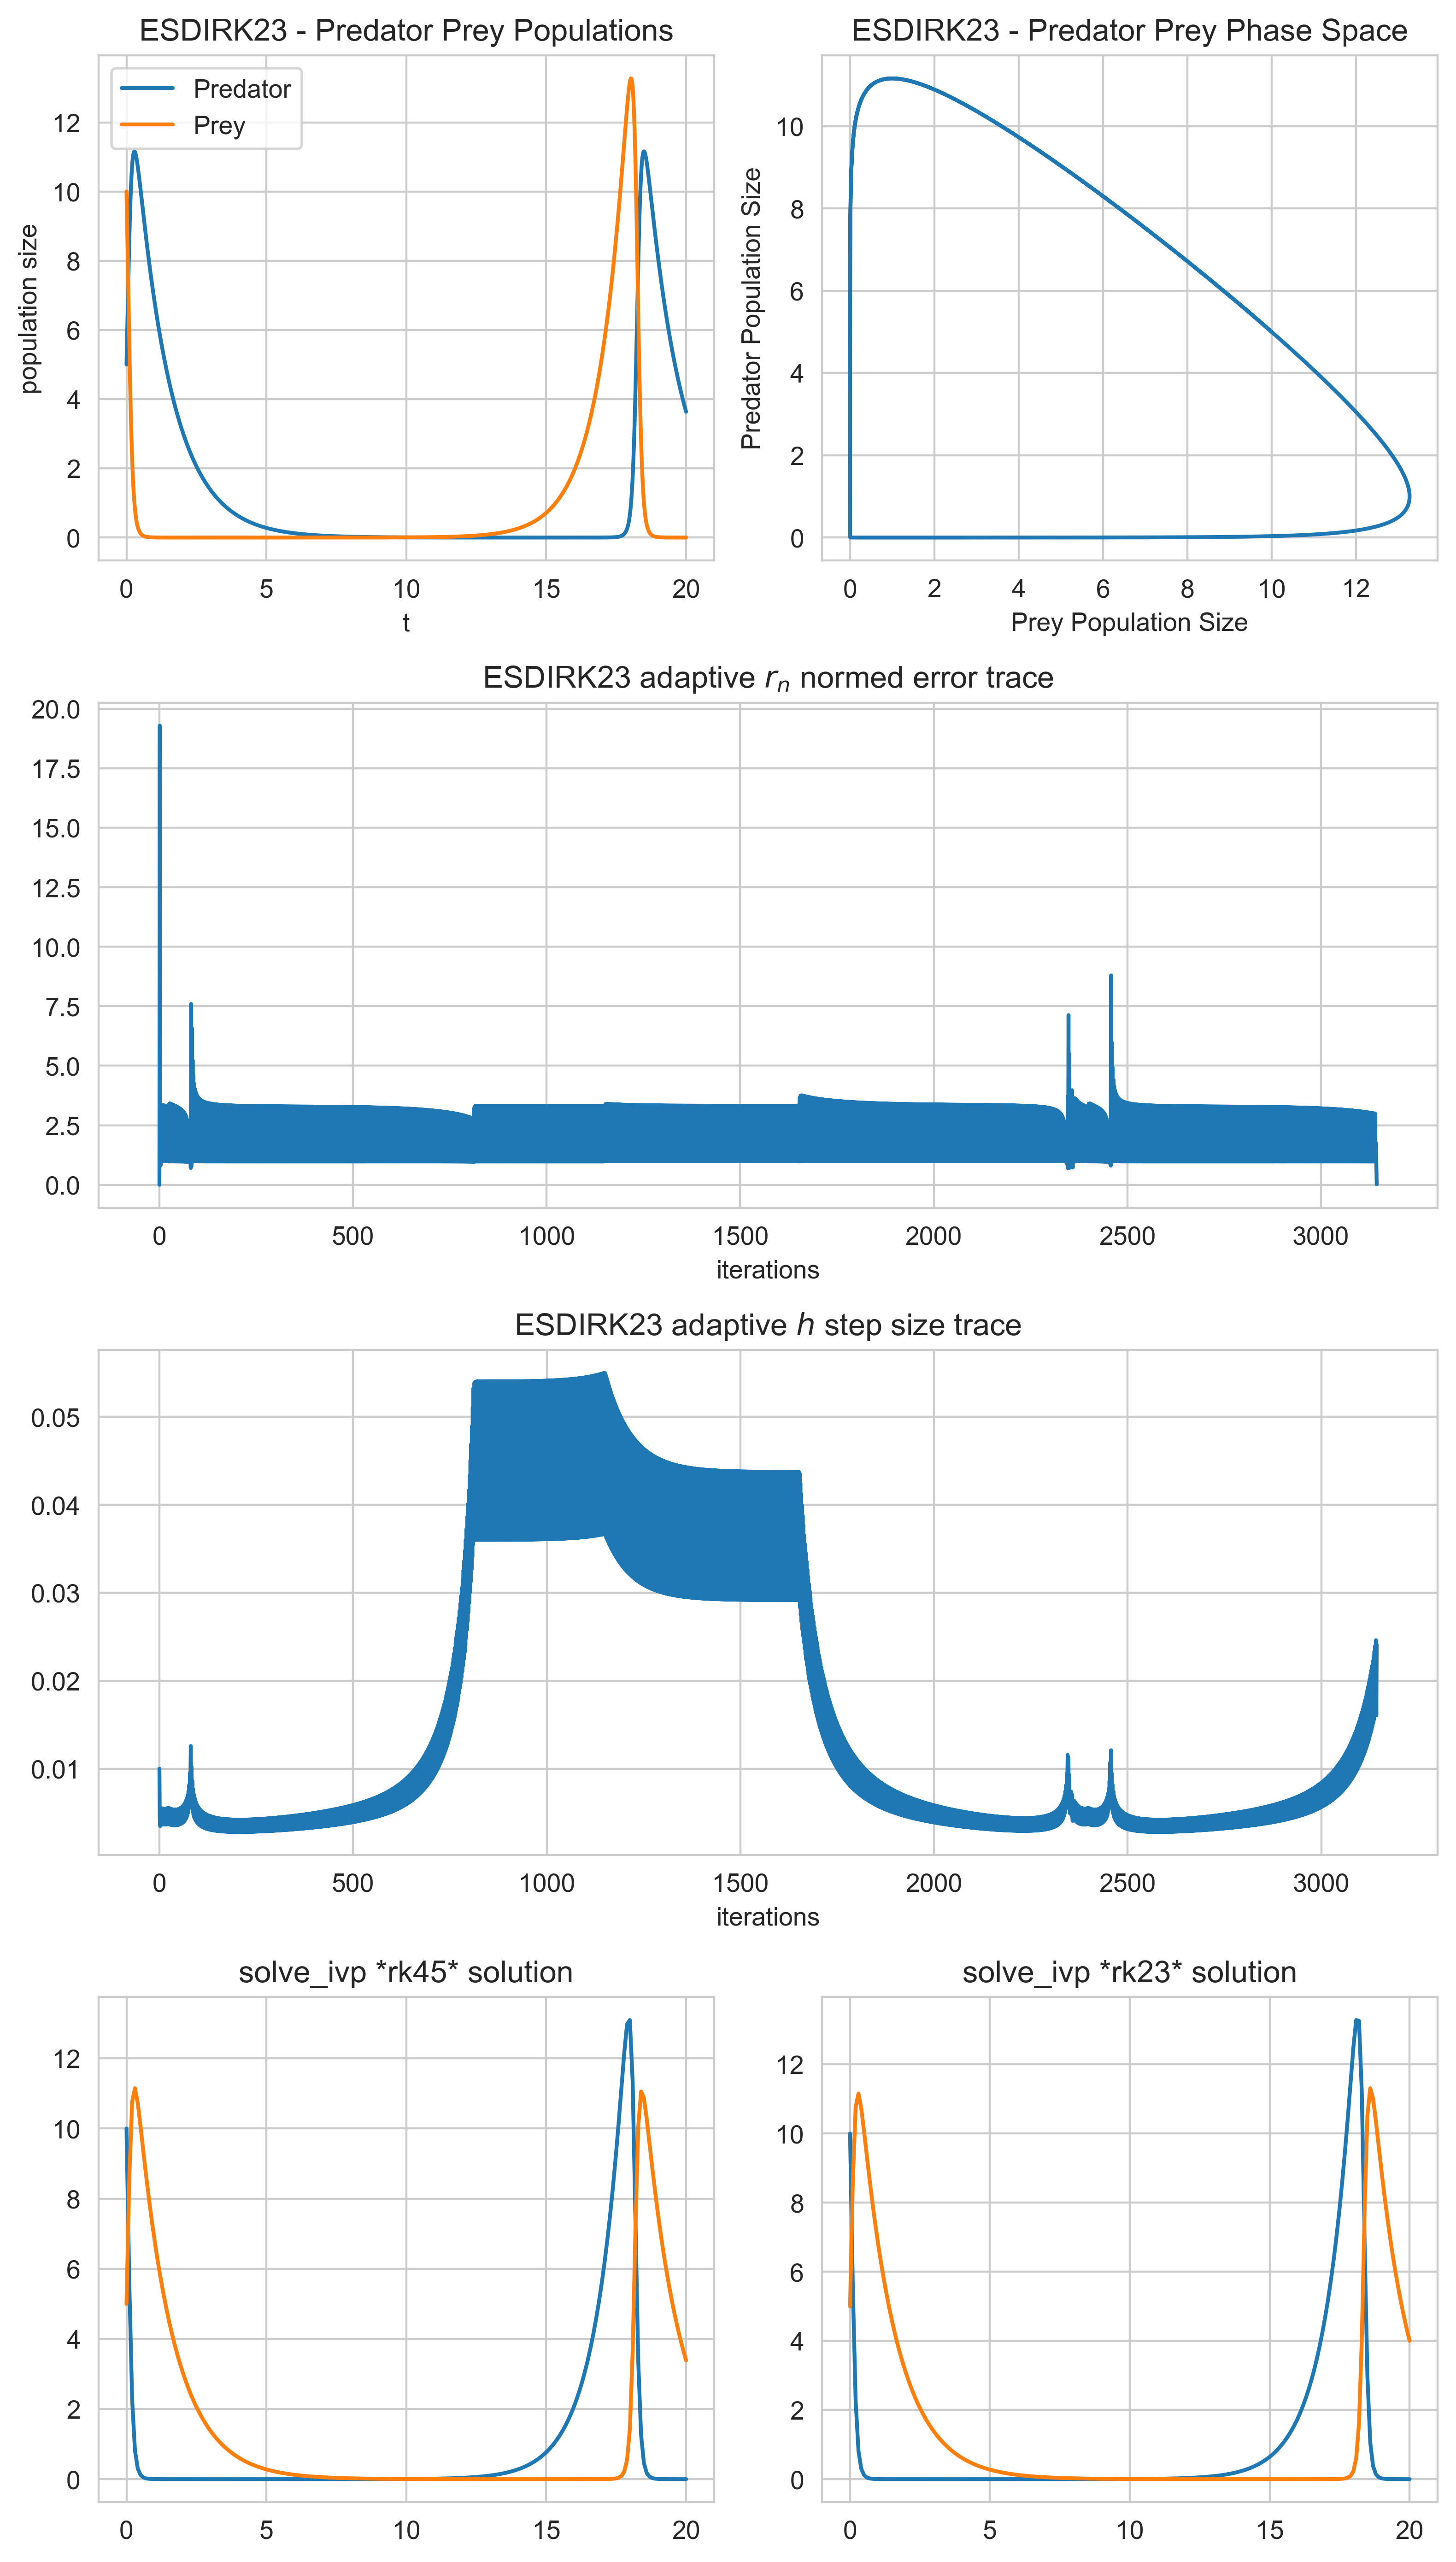

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.integrate import solve_ivp
from project.solver_ import ESDIRK23
from project.models import PreyPredator, PreyPredator_Jac
sns.set_style('whitegrid')

y0=[10.0, 5.0]
solver = ESDIRK23(h_init=0.01)
res = solver.integrate_adaptive(PreyPredator, t0=0, y0=y0, tf=20, jac=PreyPredator_Jac)

plt.figure(figsize=(8,14), dpi=400)
plt.subplot(4,2,1)
plt.title('ESDIRK23 - Predator Prey Populations')
plt.plot(res[1]['t'], res[0][:, 1], label='Predator')
plt.plot(res[1]['t'], res[0][:, 0], label='Prey')
plt.xlabel('t')
plt.ylabel('population size')
plt.legend()

plt.subplot(4,2,2)
plt.title('ESDIRK23 - Predator Prey Phase Space')
plt.plot(res[0][:, 0], res[0][:, 1])
plt.xlabel('Prey Population Size')
plt.ylabel('Predator Population Size')

plt.subplot(4,1,2)
plt.title('ESDIRK23 adaptive $r_n$ normed error trace')
plt.plot(res[1]['rel_err_norm'])
plt.xlabel('iterations')

plt.subplot(4,1,3)
plt.title('ESDIRK23 adaptive $h$ step size trace')
plt.plot(res[1]['h_step_width'])
plt.xlabel('iterations')

res = solve_ivp(PreyPredator, t_span=(0,20), y0=y0, t_eval=np.linspace(0,20,200), method='RK45')
plt.subplot(4,2,7)
plt.title('solve_ivp *rk45* solution')
plt.plot(res.t, res.y[0])
plt.plot(res.t, res.y[1])

res = solve_ivp(PreyPredator, t_span=(0,20), y0=y0, t_eval=np.linspace(0,20,200), method='RK23')
plt.subplot(4,2,8)
plt.title('solve_ivp *rk23* solution')
plt.plot(res.t, res.y[0])
plt.plot(res.t, res.y[1])

# because non-stiff problem, explicit solvers work fine
# res = solve_ivp(PreyPredator, t_span=(0,20), y0=y0, t_eval=np.linspace(0,20,200), method='BDF')
# plt.subplot(4,2,7)
# plt.title('solve_ivp *BDF* solution')
# plt.plot(res.t, res.y[0])
# plt.plot(res.t, res.y[1])

plt.tight_layout()

### Lotka Volterra

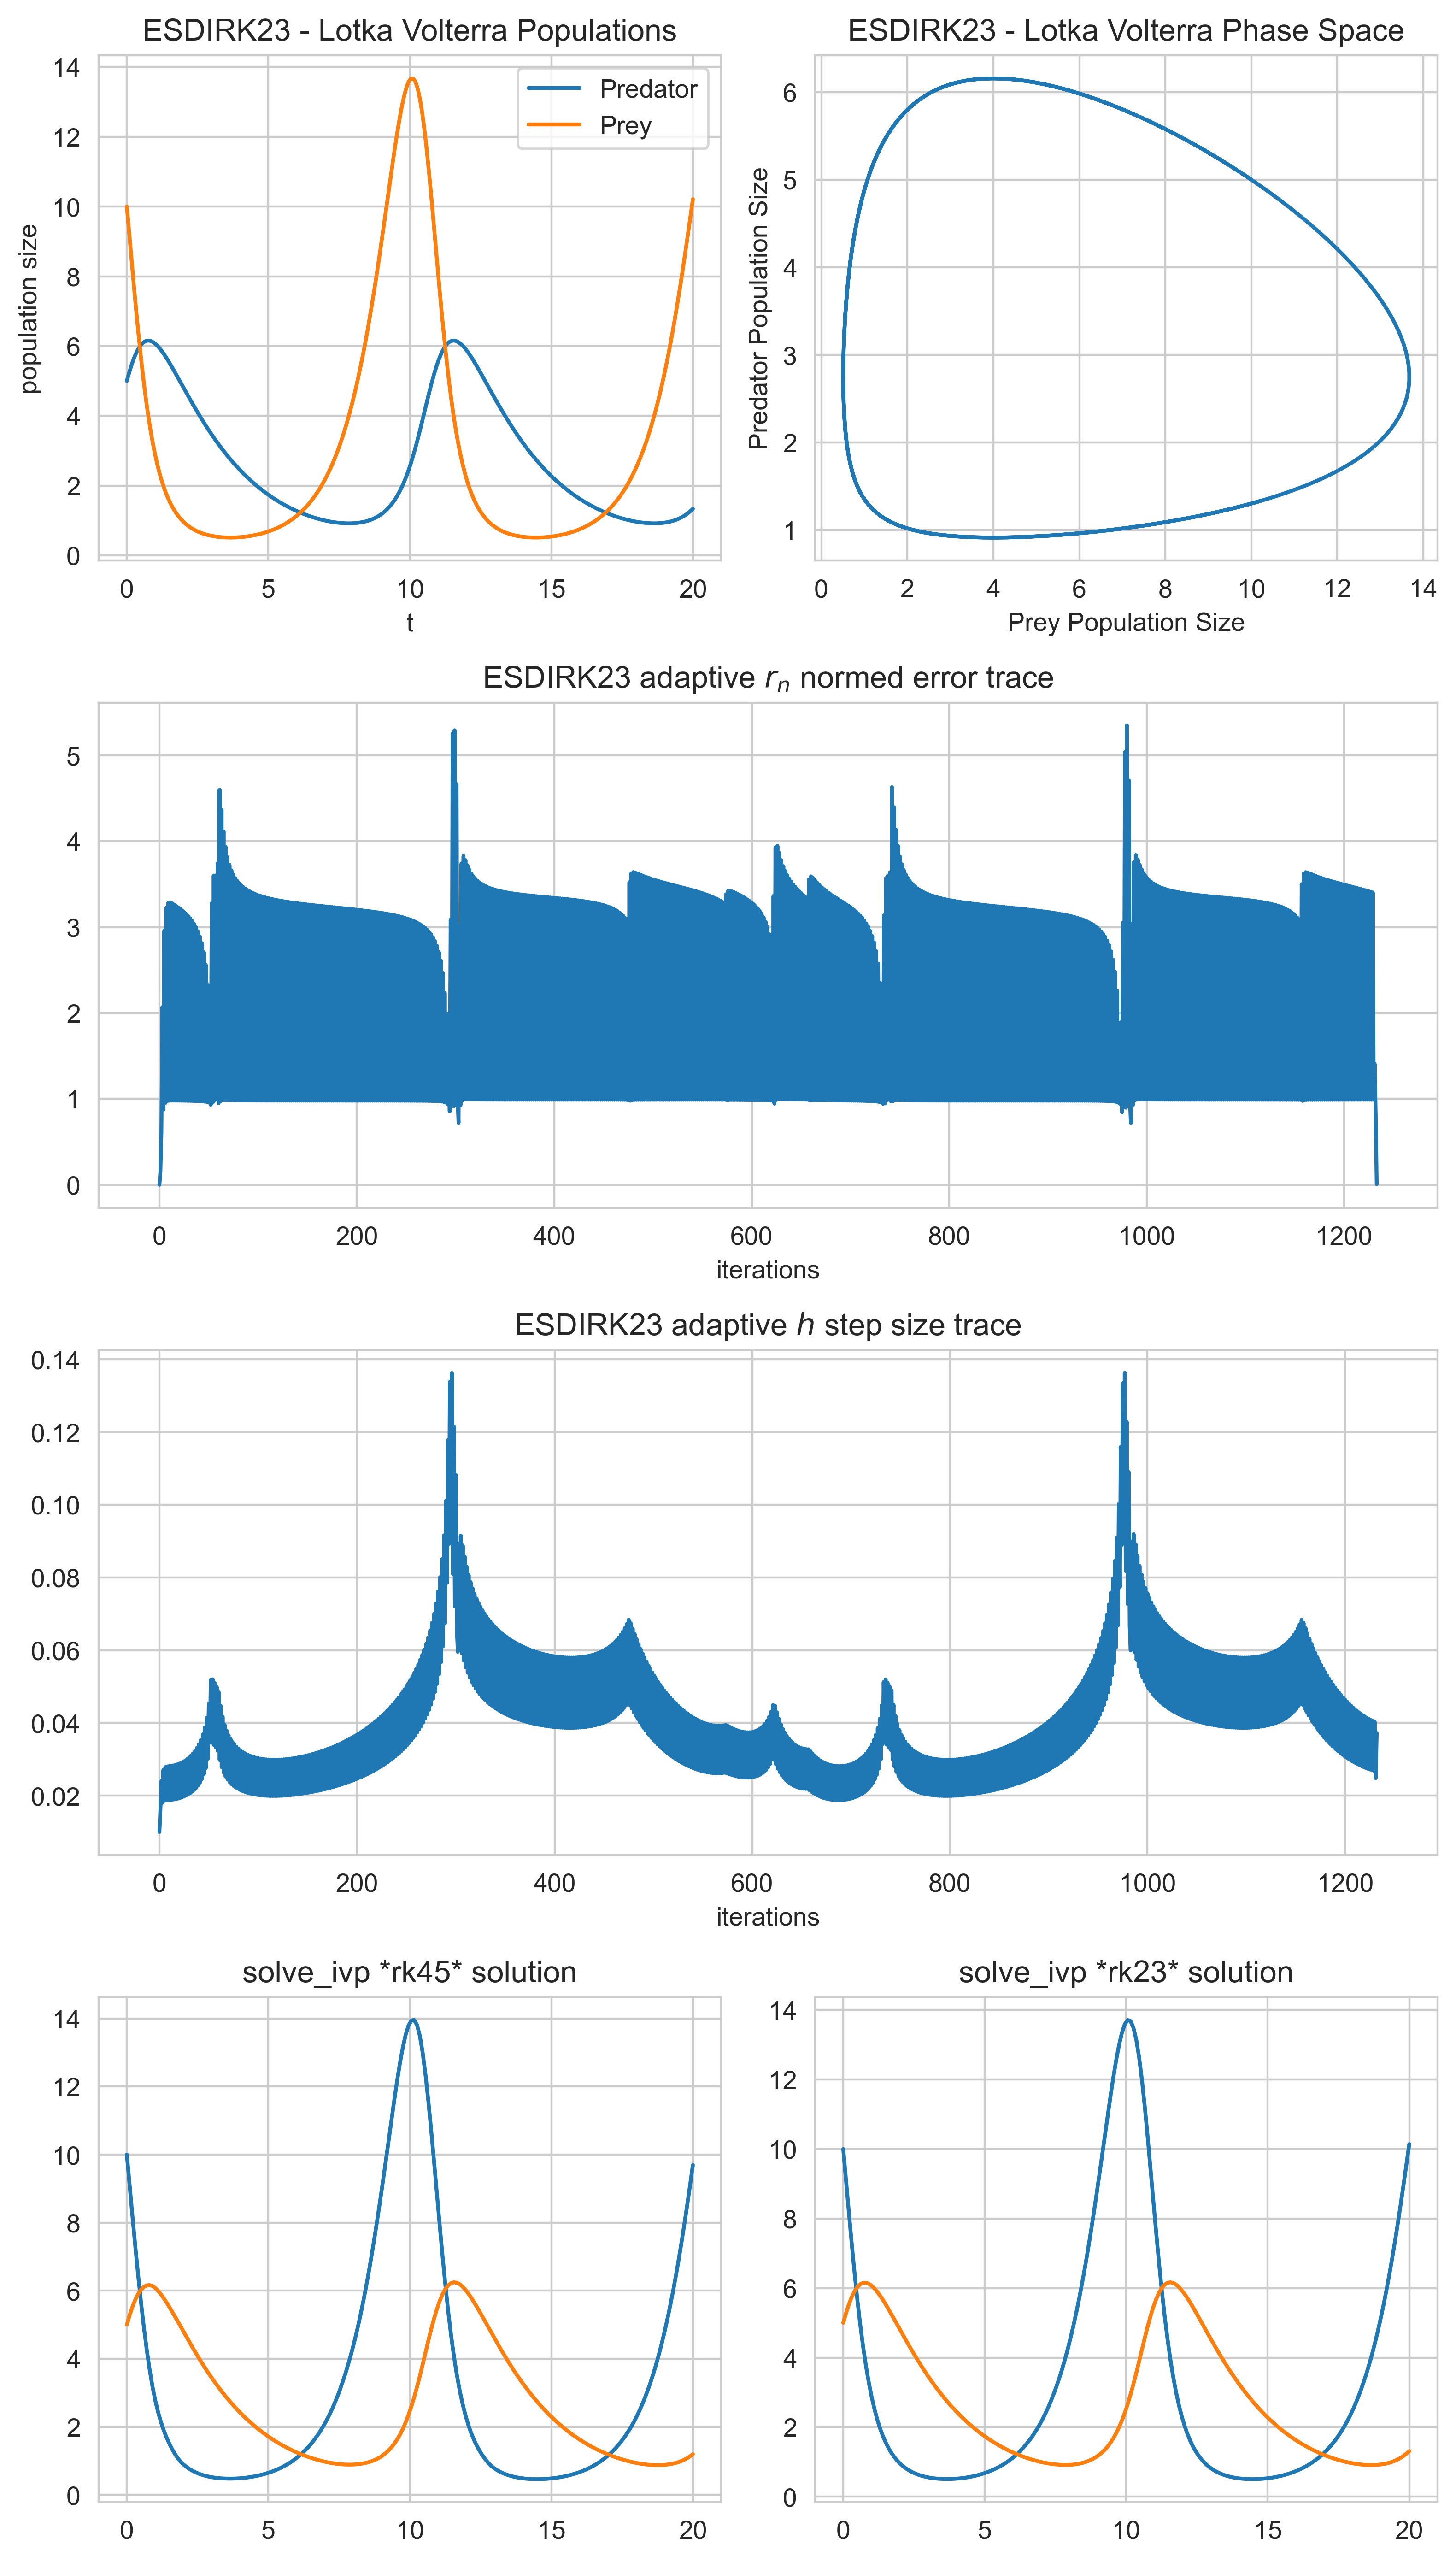

In [ ]:
from project.models import LotkaVolterra, LotkaVolterra_Jac

y0=[10.0, 5.0]
solver = ESDIRK23(h_init=0.01)
res = solver.integrate_adaptive(LotkaVolterra, t0=0, y0=y0, tf=20, jac=LotkaVolterra_Jac)

plt.figure(figsize=(8,14), dpi=400)
plt.subplot(4,2,1)
plt.title('ESDIRK23 - Lotka Volterra Populations')
plt.plot(res[1]['t'], res[0][:, 1], label='Predator')
plt.plot(res[1]['t'], res[0][:, 0], label='Prey')
plt.xlabel('t')
plt.ylabel('population size')
plt.legend()

plt.subplot(4,2,2)
plt.title('ESDIRK23 - Lotka Volterra Phase Space')
plt.plot(res[0][:, 0], res[0][:, 1])
plt.xlabel('Prey Population Size')
plt.ylabel('Predator Population Size')

plt.subplot(4,1,2)
plt.title('ESDIRK23 adaptive $r_n$ normed error trace')
plt.plot(res[1]['rel_err_norm'])
plt.xlabel('iterations')

plt.subplot(4,1,3)
plt.title('ESDIRK23 adaptive $h$ step size trace')
plt.plot(res[1]['h_step_width'])
plt.xlabel('iterations')

res = solve_ivp(LotkaVolterra, t_span=(0,20), y0=y0, t_eval=np.linspace(0,20,200), method='RK45')
plt.subplot(4,2,7)
plt.title('solve_ivp *rk45* solution')
plt.plot(res.t, res.y[0])
plt.plot(res.t, res.y[1])

res = solve_ivp(LotkaVolterra, t_span=(0,20), y0=y0, t_eval=np.linspace(0,20,200), method='RK23')
plt.subplot(4,2,8)
plt.title('solve_ivp *rk23* solution')
plt.plot(res.t, res.y[0])
plt.plot(res.t, res.y[1])

plt.tight_layout()

### Van der Pol

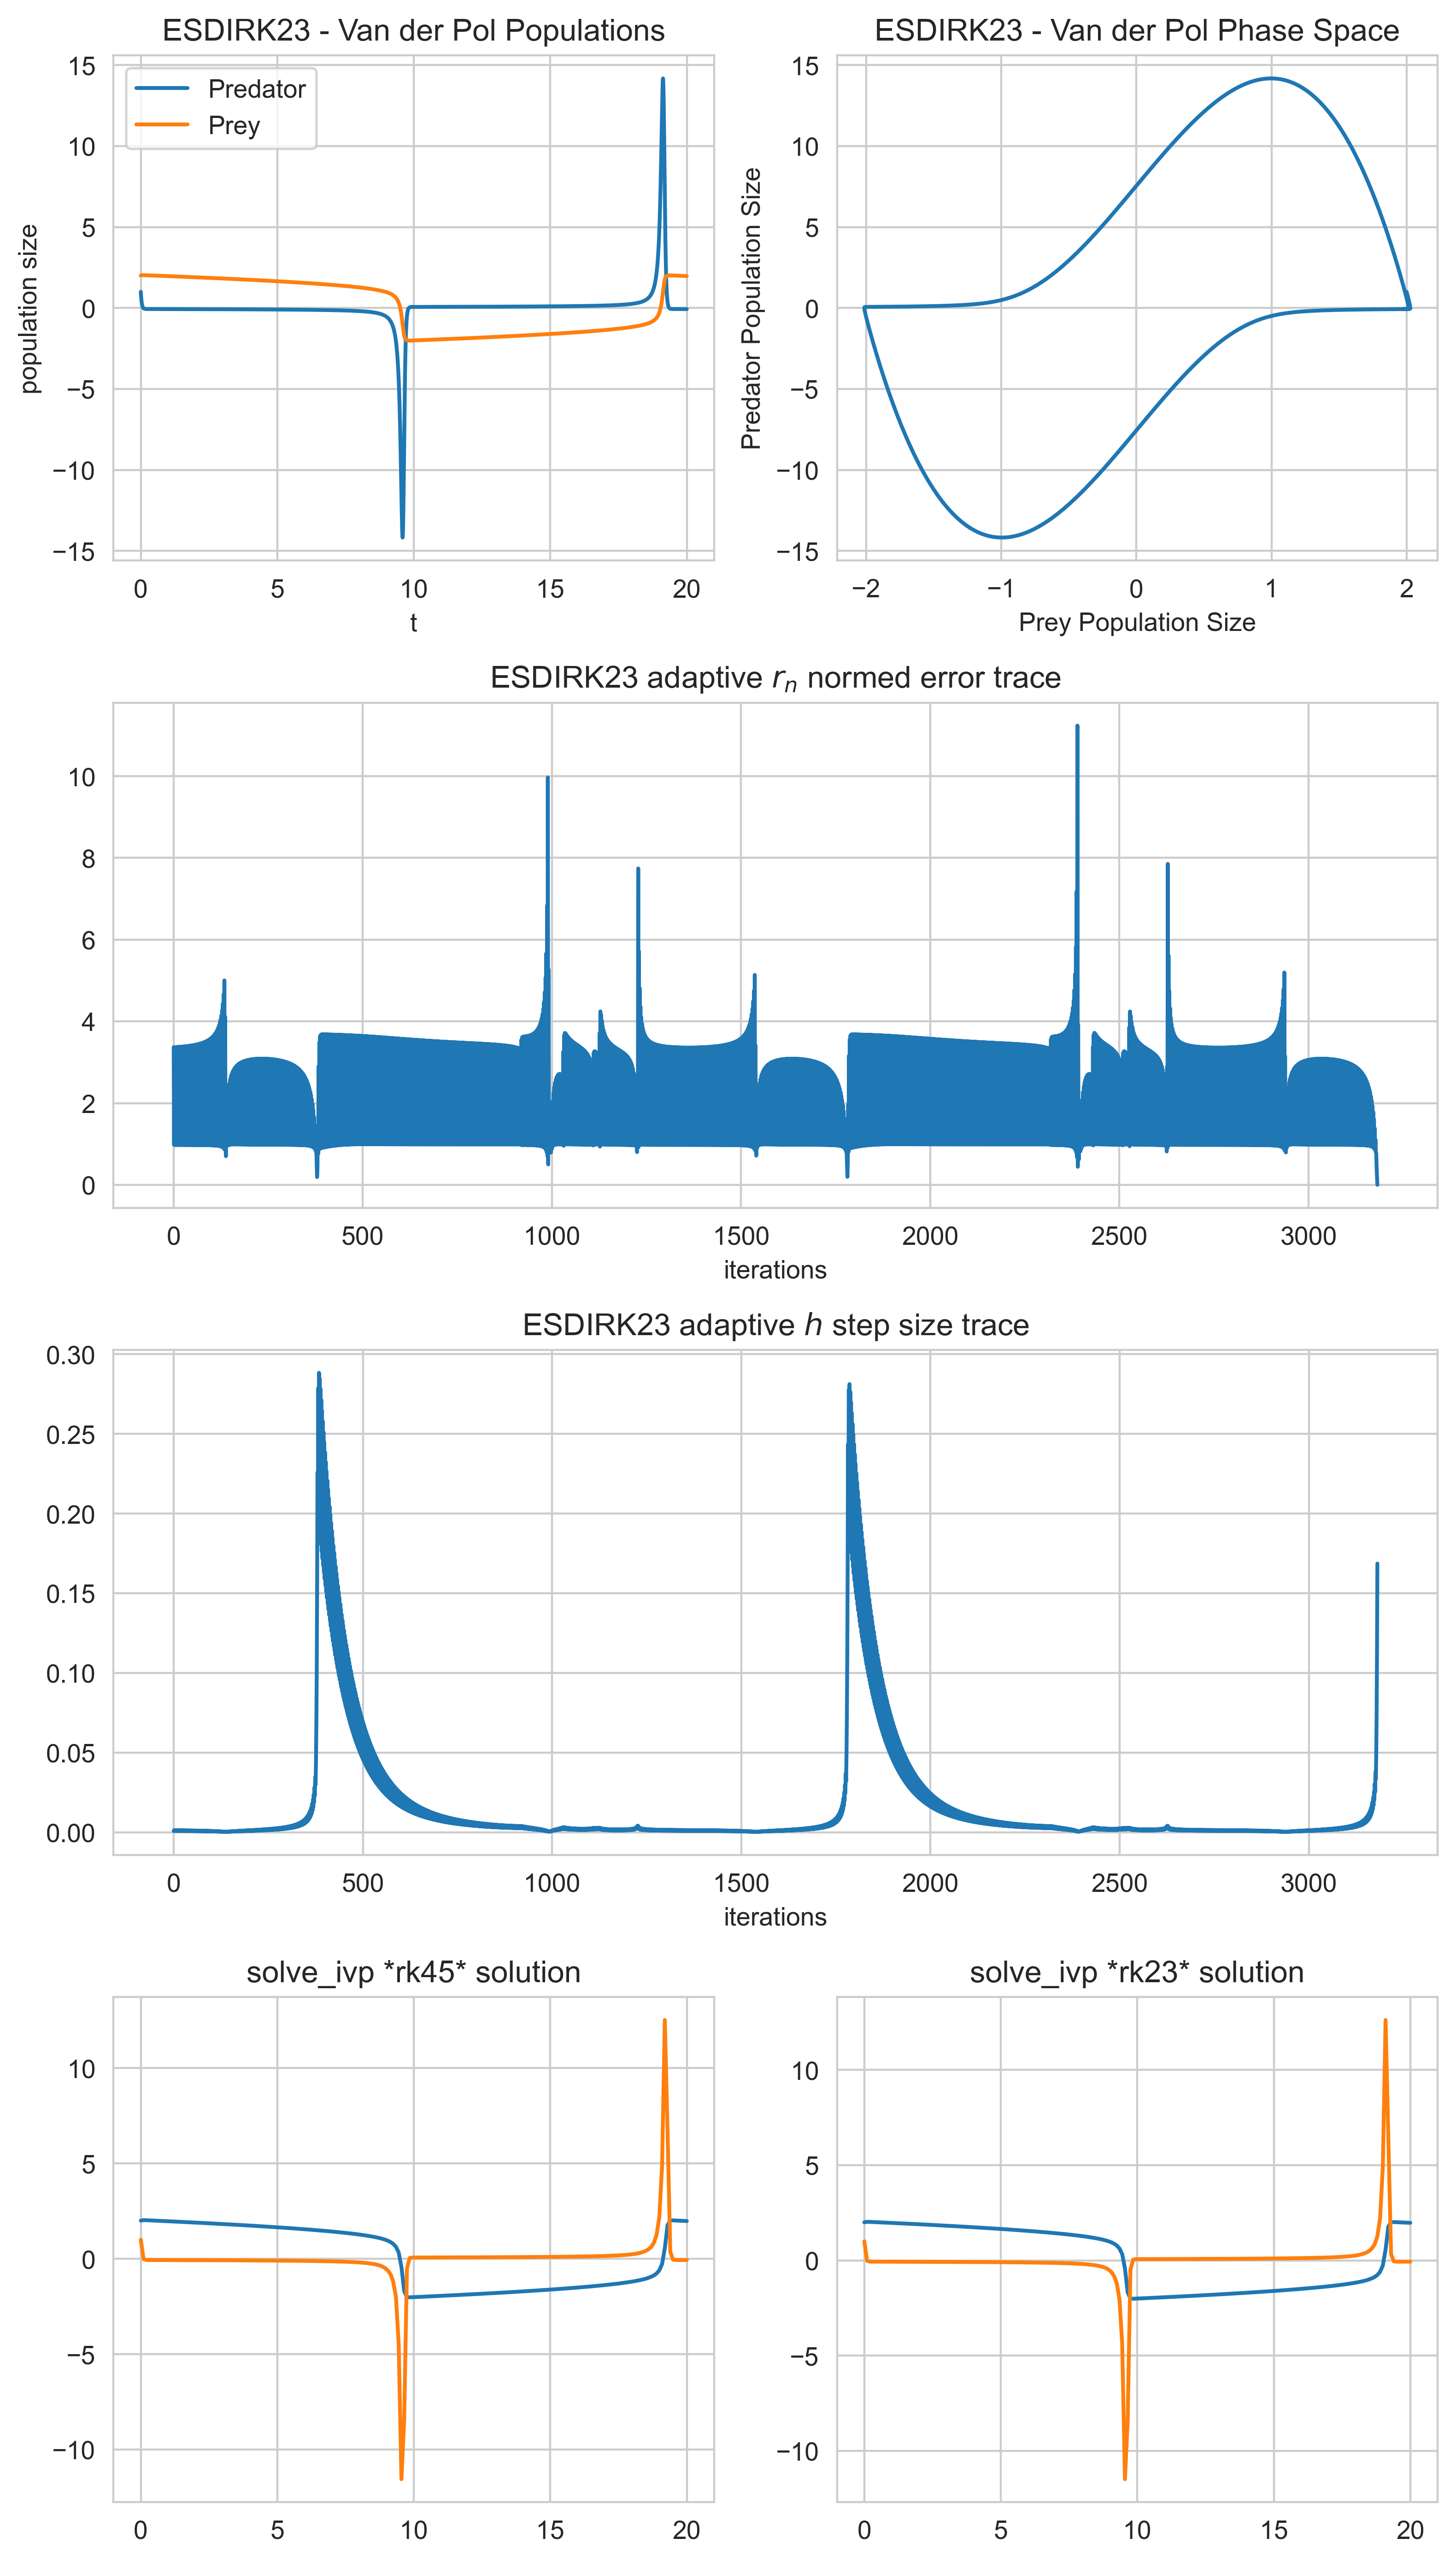

In [30]:
from project.models import VanDerPol, VanDerPol_Jac

y0=[2.0, 1.0]
solver = ESDIRK23()
res = solver.integrate_adaptive(VanDerPol, t0=0, y0=y0, tf=20, jac=VanDerPol_Jac)

plt.figure(figsize=(8,14), dpi=400)
plt.subplot(4,2,1)
plt.title('ESDIRK23 - Van der Pol Populations')
plt.plot(res[1]['t'], res[0][:, 1], label='Predator')
plt.plot(res[1]['t'], res[0][:, 0], label='Prey')
plt.xlabel('t')
plt.ylabel('population size')
plt.legend()

plt.subplot(4,2,2)
plt.title('ESDIRK23 - Van der Pol Phase Space')
plt.plot(res[0][:, 0], res[0][:, 1])
plt.xlabel('Prey Population Size')
plt.ylabel('Predator Population Size')

plt.subplot(4,1,2)
plt.title('ESDIRK23 adaptive $r_n$ normed error trace')
plt.plot(res[1]['rel_err_norm'][100:]) # added burn-in
plt.xlabel('iterations')

plt.subplot(4,1,3)
plt.title('ESDIRK23 adaptive $h$ step size trace')
plt.plot(res[1]['h_step_width'][100:])
plt.xlabel('iterations')

res = solve_ivp(VanDerPol, t_span=(0,20), y0=y0, t_eval=np.linspace(0,20,200), method='RK45')
plt.subplot(4,2,7)
plt.title('solve_ivp *rk45* solution')
plt.plot(res.t, res.y[0])
plt.plot(res.t, res.y[1])

res = solve_ivp(VanDerPol, t_span=(0,20), y0=y0, t_eval=np.linspace(0,20,200), method='RK23')
plt.subplot(4,2,8)
plt.title('solve_ivp *rk23* solution')
plt.plot(res.t, res.y[0])
plt.plot(res.t, res.y[1])

plt.tight_layout()

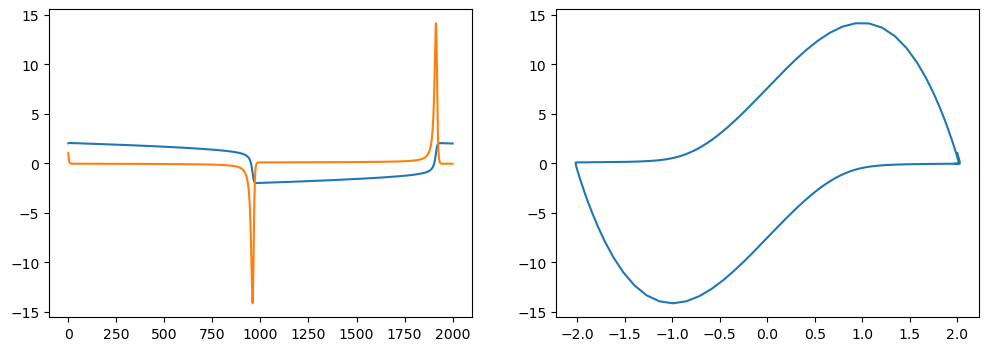

In [73]:
solver = ESDIRK23(h_init=0.01)
res = solver.integrate_fixed(VanDerPol, t0=0, y0=[2.0, 1.0], tf=20, jac=VanDerPol_Jac, h=0.01)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(res[0])
plt.subplot(1,2,2)
plt.plot(res[0][:, 0], res[0][:, 1])

### CSTR3

Iteration 500, err: 3.2023203346378786, h: 0.01312973361246841, t: 1.9544505551189242
ESDIRK23 step_evals 718
RK45 step_evals 206
RK23 step_evals 146


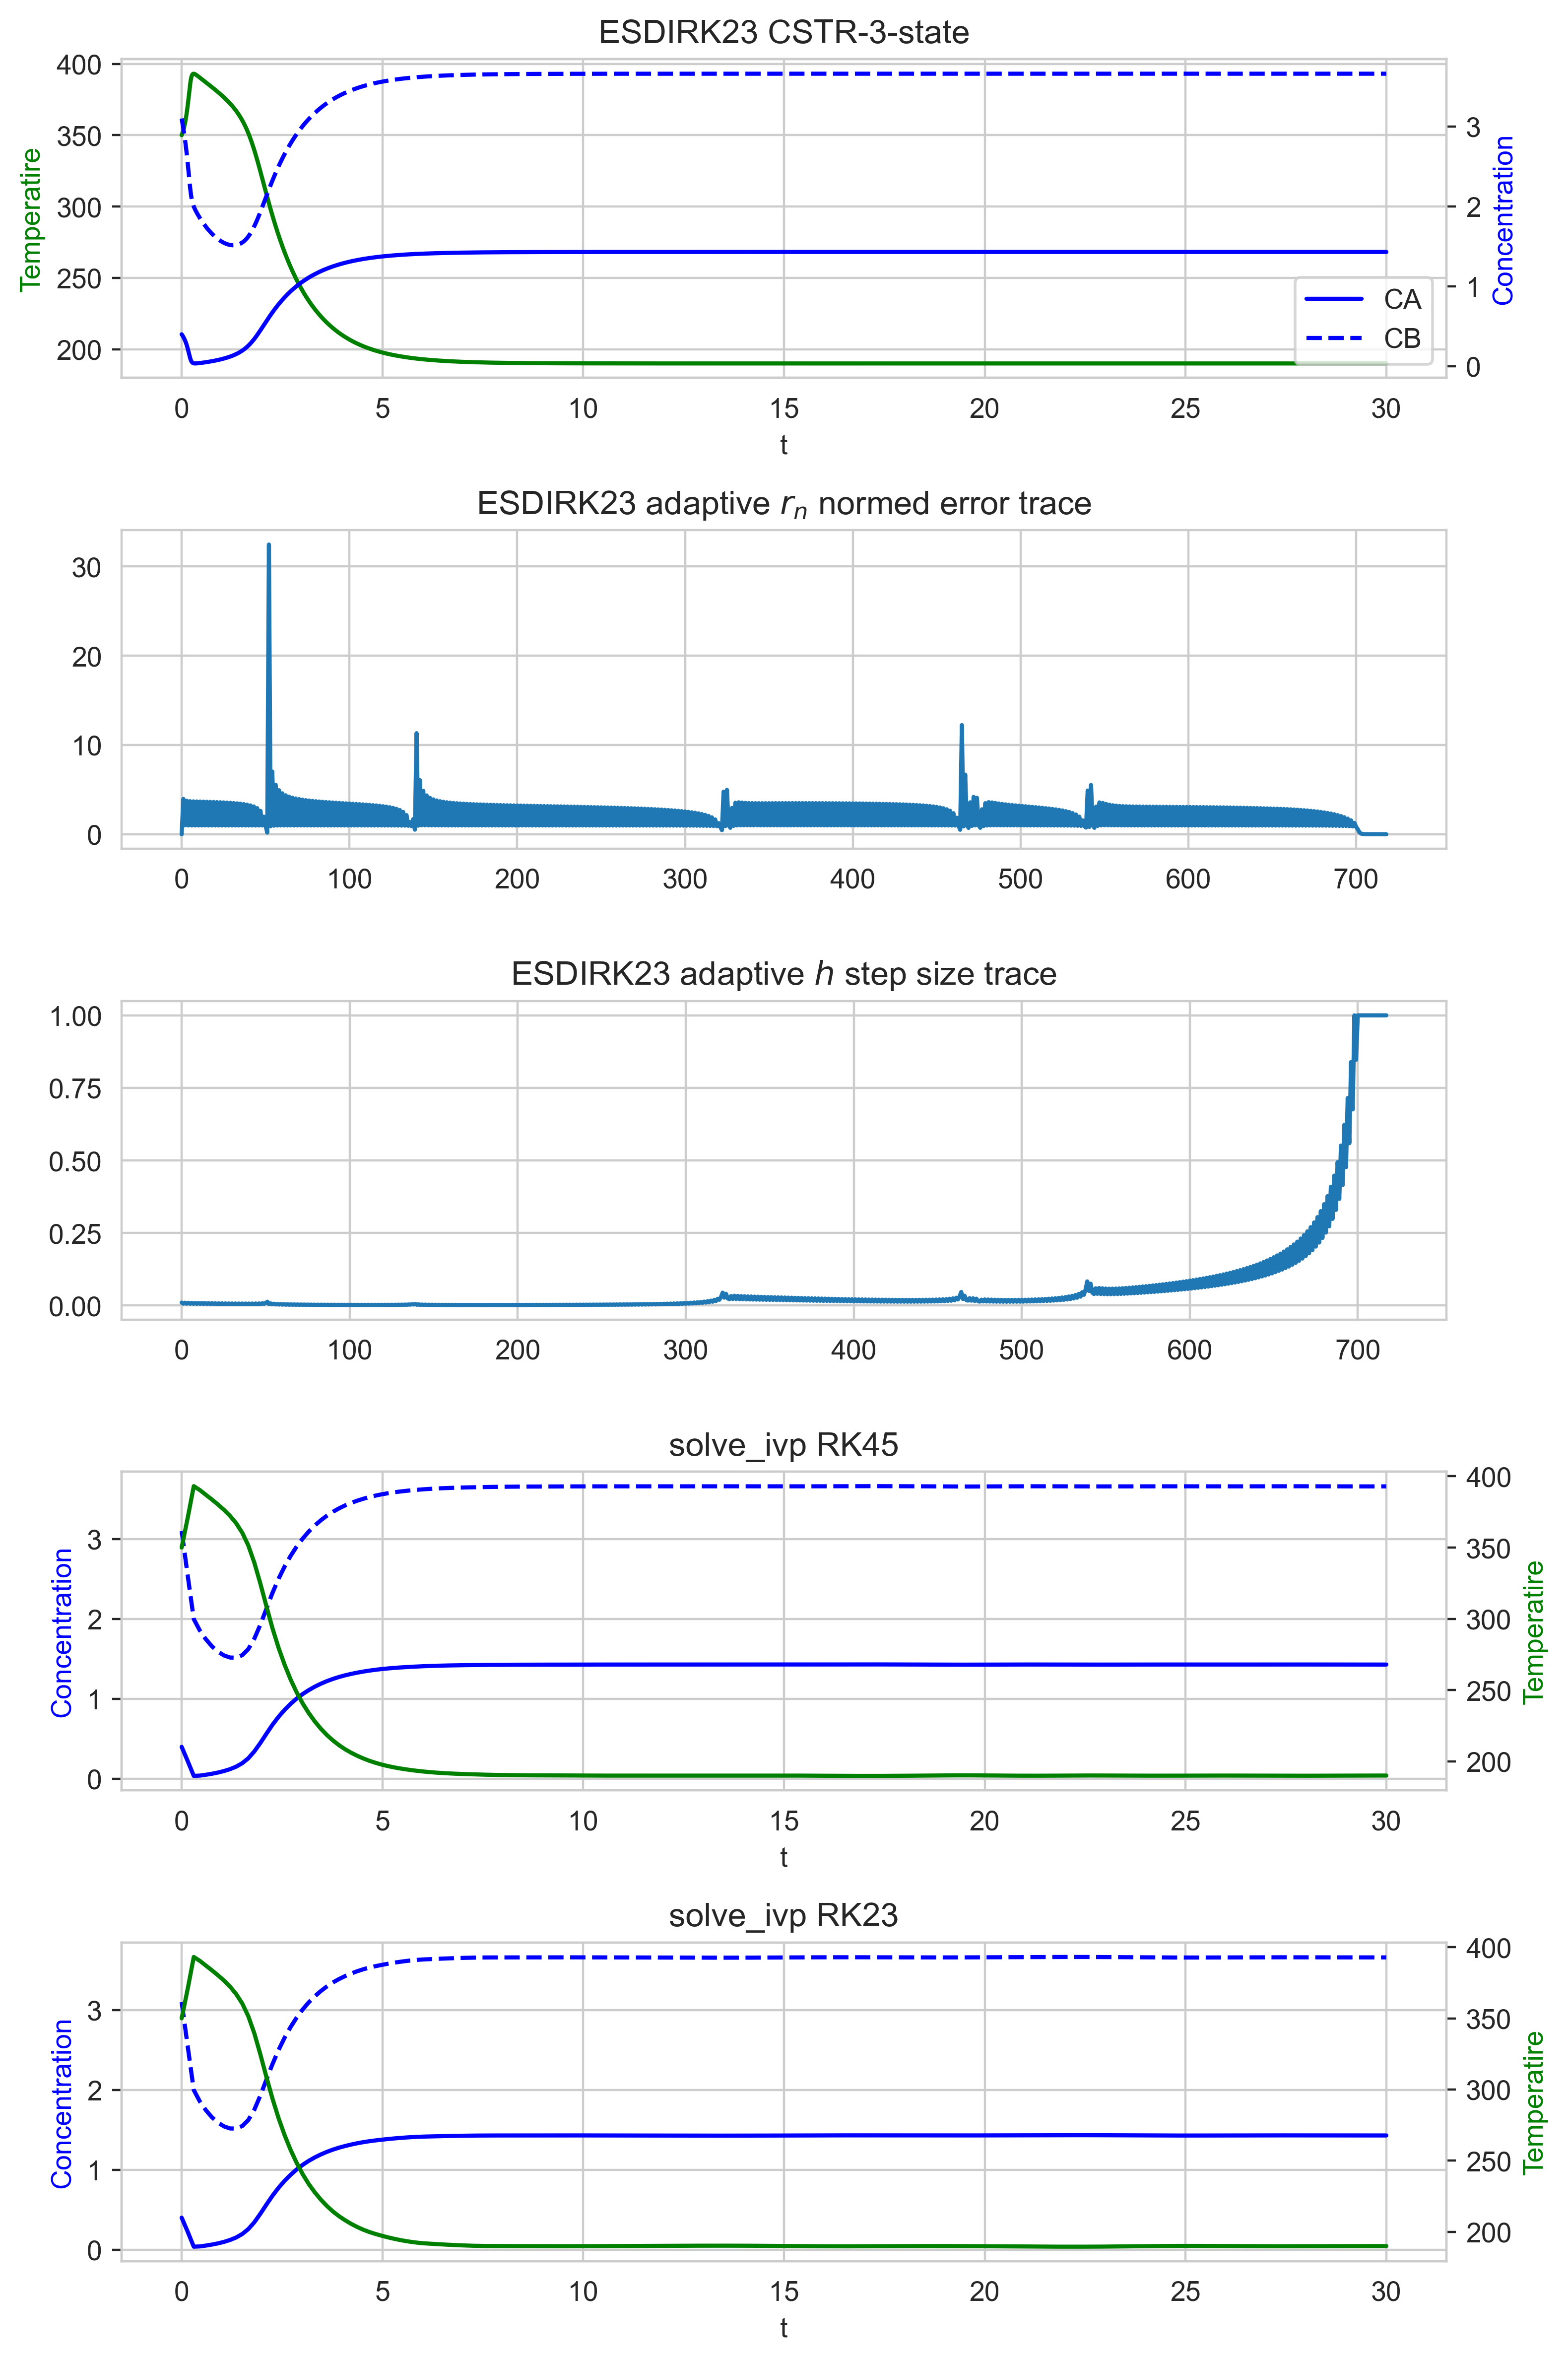

In [36]:
from project.models import CSTR3, CSTR3_Jac

#C0 = np.array([1.6/2, 2.4/2, 600]) 
#C0 = np.array([2.4, 4.1, 300]) -> works!
C0 = np.array([0.4, 3.1, 350]) 
#C0 = np.array([2.4, 3.1, 200]) -> works!
#C0 = np.array([1.4, 3.7, 200]) -> works!
solver = ESDIRK23(h_init=0.01)
#res = solver.integrate_fixed(CSTR3, t0=0, y0=C0, tf=20, jac=CSTR3_Jac, h=0.001)
res = solver.integrate_adaptive(CSTR3, t0=0, y0=C0, tf=30, jac=CSTR3_Jac, verbose=True)
print("ESDIRK23 step_evals", res[1]['step_evals'])

fig, [ax1, ax3, ax4, ax5, ax7] = plt.subplots(nrows=5, ncols=1, figsize=(8,12), dpi=400)

ax1.set_title("ESDIRK23 CSTR-3-state")
ax1.plot(res[1]['t'], res[0][:,2], 'g-')
ax2 = ax1.twinx()
ax2.plot(res[1]['t'], res[0][:,0], 'b', linestyle='-', label='CA')
ax2.plot(res[1]['t'], res[0][:,1], 'b', linestyle='--', label='CB')

ax1.set_xlabel('t')
ax1.set_ylabel('Temperatire', color='g')
ax2.set_ylabel('Concentration', color='b')
ax2.grid(False)
ax2.legend()

ax3.set_title('ESDIRK23 adaptive $r_n$ normed error trace')
ax3.plot(res[1]['rel_err_norm'])

ax4.set_title('ESDIRK23 adaptive $h$ step size trace')
ax4.plot(res[1]['h_step_width'])

res = solve_ivp(CSTR3, t_span=(0,30), y0=C0, t_eval=np.linspace(0,30,200), method='RK45')
print("RK45 step_evals", res.nfev)
ax5.set_title("solve_ivp RK45")
ax5.plot(res.t, res.y[0], 'b', linestyle='-', label='CA')
ax5.plot(res.t, res.y[1], 'b', linestyle='--', label='CB')
ax5.set_ylabel('Concentration', color='b')
ax5.set_xlabel('t')
ax6 = ax5.twinx()
ax6.plot(res.t, res.y[2], 'g-', label='Temperature')
ax6.grid(False)
ax6.set_ylabel('Temperatire', color='g')

res = solve_ivp(CSTR3, t_span=(0,30), y0=C0, t_eval=np.linspace(0,30,200), method='RK23')
print("RK23 step_evals", res.nfev)
ax7.set_title("solve_ivp RK23")
ax7.plot(res.t, res.y[0], 'b', linestyle='-', label='CA')
ax7.plot(res.t, res.y[1], 'b', linestyle='--', label='CB')
ax7.set_ylabel('Concentration', color='b')
ax7.set_xlabel('t')
ax8 = ax7.twinx()
ax8.plot(res.t, res.y[2], 'g-', label='Temperature')
ax8.grid(False)
ax8.set_ylabel('Temperatire', color='g')

plt.tight_layout()

**14.05.2025: Jacobian Singularity Error**

**Troubleshooting:**

- same $C_0$ and $C_in$ is a problem! -> perfect steady state initially:

$$\frac{dC}{dt} = \frac{F}{V}(C_{in}-C) + \mathbf{v} \cdot r $$

- If cond(J) > 1e12, the matrix is effectively singular numerically and you should perturb the system or regularize.
- ideally we want a low condition number

**Solution:**
- essentially, the initial values sucked
- they were too close to steady state
- one could try to find a more robust implementation of ESDIRK23, that finds a well conditioned Jacobian for an initial state

In [41]:
#J = CSTR3_Jac(0, np.array([1.4, 3.1, 400]))
J = CSTR3_Jac(0, np.array([2.4, 3.1, 200]))
np.linalg.cond(J)

1.0000099960271578

### CSTR1

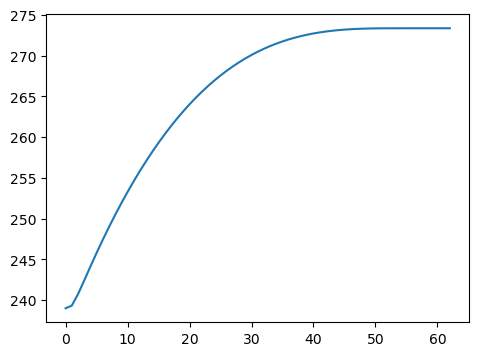

In [8]:
from models import CSTR1, CSTR1_Jac
import numpy as np
import matplotlib.pyplot as plt

# T0 = 273.15 -> works
T0 = 239.0
solver = ESDIRK23(h_init=0.01)
res = solver.integrate_adaptive(CSTR1, t0=0, y0=[T0], tf=20, jac=CSTR1_Jac)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(res[0])

### Brusselator

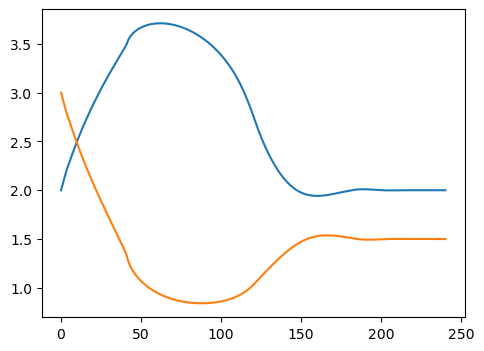

In [3]:
import numpy as np
from models import Brusselator, Brusselator_Jac
import matplotlib.pyplot as plt

y0 = [2.0, 3.0]
solver = ESDIRK23()
res = solver.integrate_adaptive(Brusselator, t0=0, y0=y0, tf=20, jac=Brusselator_Jac)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(res[0])

### Lorentz Attractor

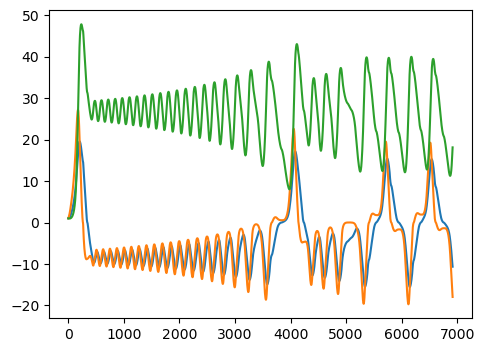

In [7]:
import numpy as np
from models import LorentzAttractor, LorentzAttractor_Jac
import matplotlib.pyplot as plt

y0 = [1.0, 1.0, 1.0]
solver = ESDIRK23()
res = solver.integrate_adaptive(LorentzAttractor, t0=0, y0=y0, tf=20, jac=LorentzAttractor_Jac)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(res[0])

### Robertson

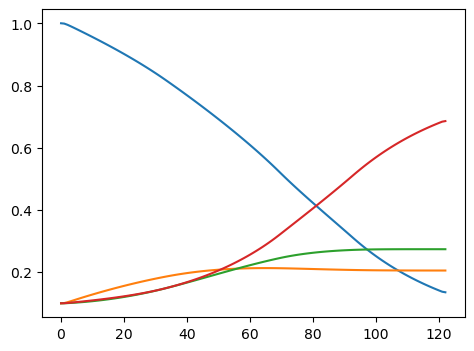

In [4]:
import numpy as np
from models import Robertson, Robertson_Jac
import matplotlib.pyplot as plt

y0 = [1.0, 0.1, 0.1, 0.1]
solver = ESDIRK23()
res = solver.integrate_adaptive(Robertson, t0=0, y0=y0, tf=20, jac=Robertson_Jac)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(res[0])

### PFR-1

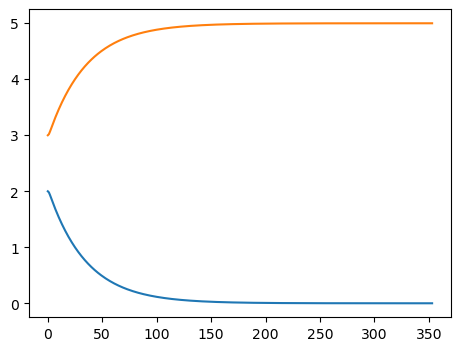

In [5]:
import numpy as np
from models import Robertson, Robertson_Jac
import matplotlib.pyplot as plt

def pfr_single(t, y, params=(1.0,)):
    k, = params
    A, B = y
    r = k * A
    return np.array([-r, r])

def jac_pfr_single(t, y, params=(1.0,)):
    k, = params
    A, _ = y
    return np.array([[-k, 0], [k, 0]])

A, B = 2.0, 3.0 # initial concentration of substances
y0 = [A, B]
solver = ESDIRK23()
res = solver.integrate_adaptive(pfr_single, t0=0, y0=y0, tf=20, jac=jac_pfr_single)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(res[0])

...but not quite what was in the paper :/

### PFR-3

In [20]:
import numpy as np
from models import PFR3, CSTR3
import matplotlib.pyplot as plt
from autograd import jacobian

# initial conditions
Nz = 10
CA0 = np.full(Nz, 0.1)
CB0 = np.full(Nz, 0.1)
T0 = np.full(Nz, 200)
C0 = np.concatenate([CA0, CB0, T0])

# try with auto jacobian
jac = jacobian(CSTR3)
solver = ESDIRK23()
res = solver.integrate_adaptive(PFR3, t0=0, y0=C0, tf=20, jac=jac)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(res[0])

RuntimeError: ESDIRK23 integration step failed at t=0 with h=0.01: too many values to unpack (expected 3)

### Hovorka

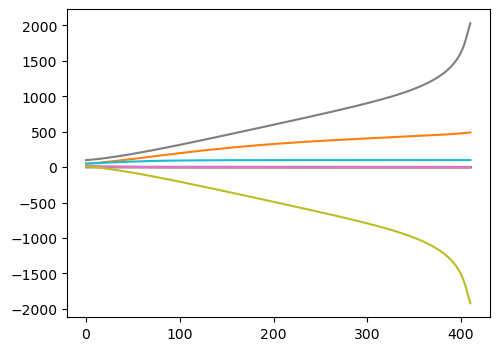

In [3]:
import numpy as np
from models import Hovorka, Hovorka_Jac
import matplotlib.pyplot as plt

y0 = [5.0, 50.0, 1.0, 1.0, 1.0, 10.0, 10.0, 100.0, 10.0, 50.0]
solver = ESDIRK23()
res = solver.integrate_adaptive(Hovorka, t0=0, y0=y0, tf=20, jac=Hovorka_Jac)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(res[0])

### Hovorka Enhanced

- Pancreatic feedback: Nonlinear β-cell stimulation.
- Insulin-dependent glucose uptake: Added saturation effects.
- Hepatic glucose production suppression via insulin.
- Glycogen storage and mobilization: In both liver and muscle.


In [ ]:
import numpy as np
from models import Hovorka_, Hovorka_Jac_
import matplotlib.pyplot as plt

y0 = [5.0, 50.0, 1.0, 1.0, 1.0, 10.0, 10.0, 100.0, 10.0, 50.0]
solver = ESDIRK23()
res = solver.integrate_adaptive(Hovorka_, t0=0, y0=y0, tf=15, jac=Hovorka_Jac_)

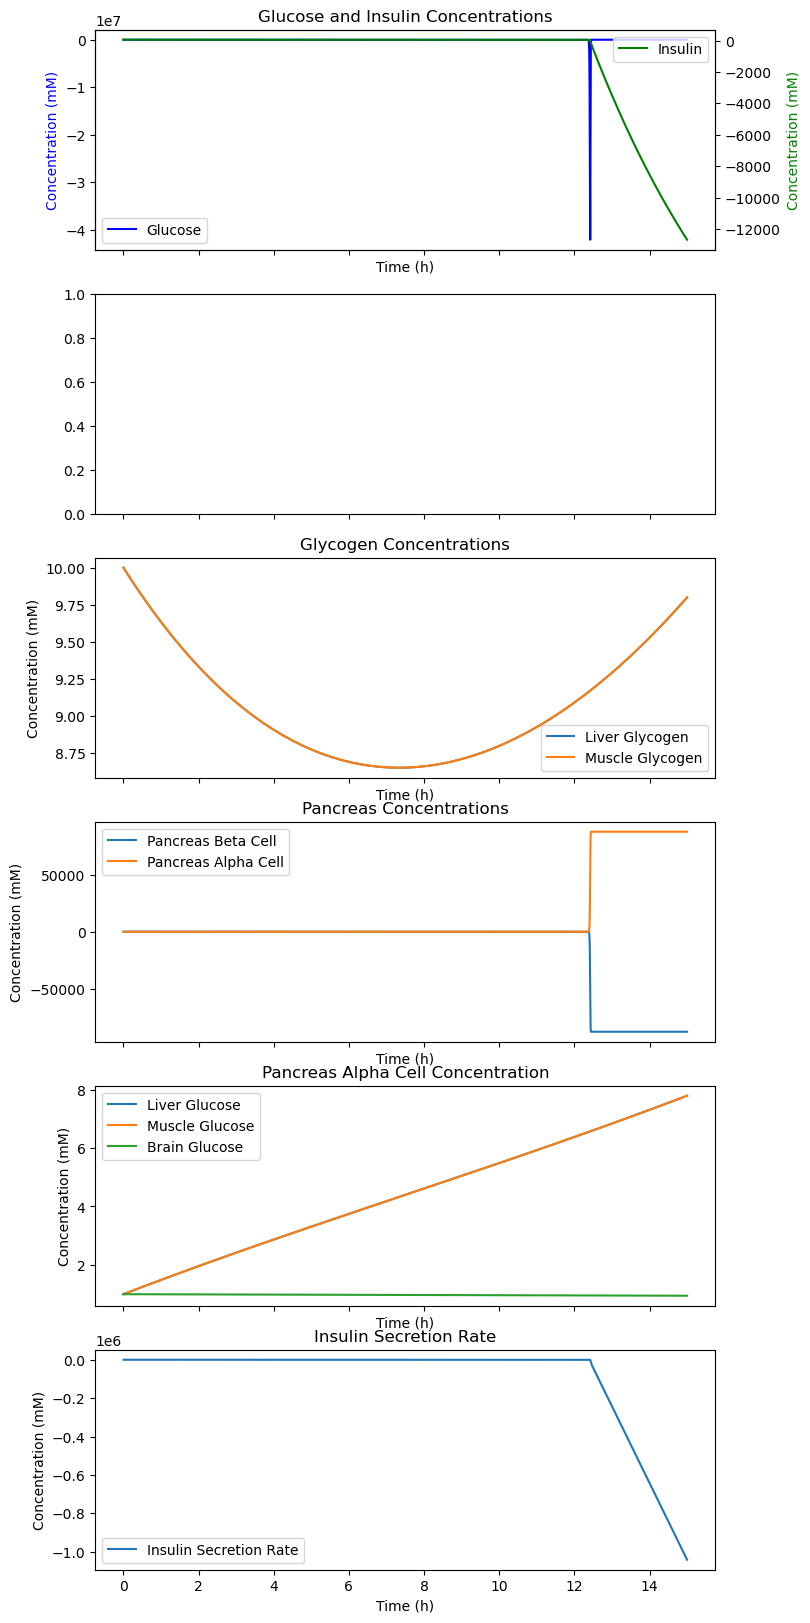

In [8]:
t = res[1]['t']
solution = res[0]

# Extract variables for plotting
Glucose = solution[:, 0]
Insulin = solution[:, 1]
LiverGlucose = solution[:, 2]
MuscleGlucose = solution[:, 3]
BrainGlucose = solution[:, 4]
LiverGlycogen = solution[:, 5]
MuscleGlycogen = solution[:, 6]
PancreasBetaCell = solution[:, 7]
PancreasAlphaCell = solution[:, 8]
InsulinSecretionRate = solution[:, 9]

# Plot the results
fig, ax = plt.subplots(6, 1, sharex=True, figsize=(8, 20))

ax[1] = ax[0].twinx()
ax[1].plot(t, Insulin, label='Insulin', c='g')
ax[1].set_ylabel('Concentration (mM)', color='g')
ax[1].legend()
ax[0].plot(t, Glucose, label='Glucose', c='b')
ax[0].set_ylabel('Concentration (mM)', color='b')
ax[0].set_xlabel('Time (h)')
ax[0].set_title('Glucose and Insulin Concentrations')
ax[0].legend()

ax[2].plot(t,LiverGlycogen, label='Liver Glycogen')
ax[2].plot(t, MuscleGlycogen, label='Muscle Glycogen')
ax[2].set_xlabel('Time (h)')
ax[2].set_ylabel('Concentration (mM)')
ax[2].set_title('Glycogen Concentrations')
ax[2].legend()

ax[3].plot(t, PancreasBetaCell, label='Pancreas Beta Cell')
ax[3].plot(t, PancreasAlphaCell, label='Pancreas Alpha Cell')
ax[3].set_xlabel('Time (h)')
ax[3].set_ylabel('Concentration (mM)')
ax[3].set_title('Pancreas Concentrations')
ax[3].legend()

ax[4].plot(t, LiverGlucose, label='Liver Glucose')
ax[4].plot(t, MuscleGlucose, label='Muscle Glucose')
ax[4].plot(t, BrainGlucose, label='Brain Glucose')
ax[4].set_xlabel('Time (h)')
ax[4].set_ylabel('Concentration (mM)')
ax[4].set_title('Pancreas Alpha Cell Concentration')
ax[4].legend()

ax[5].plot(t, InsulinSecretionRate, label='Insulin Secretion Rate')
ax[5].set_xlabel('Time (h)')
ax[5].set_ylabel('Concentration (mM)')
ax[5].set_title('Insulin Secretion Rate')
ax[5].legend()

In [9]:
import json
f = open('./traces/ESDIRK23_adaptive_14_05_2025__15_04_44.json', 'r')
trace = json.load(f)

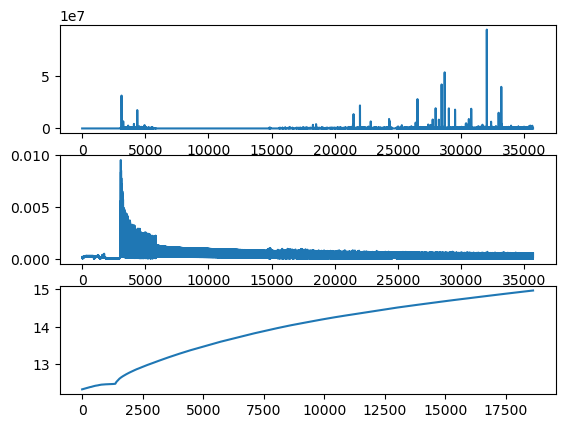

In [10]:
plt.subplot(3,1,1)
plt.plot(trace['rel_err_norm'][300:50000])
plt.subplot(3,1,2)
plt.plot(trace['h_step_width'][300:50000])
plt.subplot(3,1,3)
plt.plot(trace['t'][300:50000])